In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("B:/SentimentAnalysis/customer_booking.csv", encoding="ISO-8859-1")
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [27]:
print("\nColumn names and data types:")
df.info()


Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8),

In [28]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [29]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [30]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [31]:
print("\nBasic statistics of the dataset:")
df.describe()


Basic statistics of the dataset:


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [32]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


Plotting a histogram

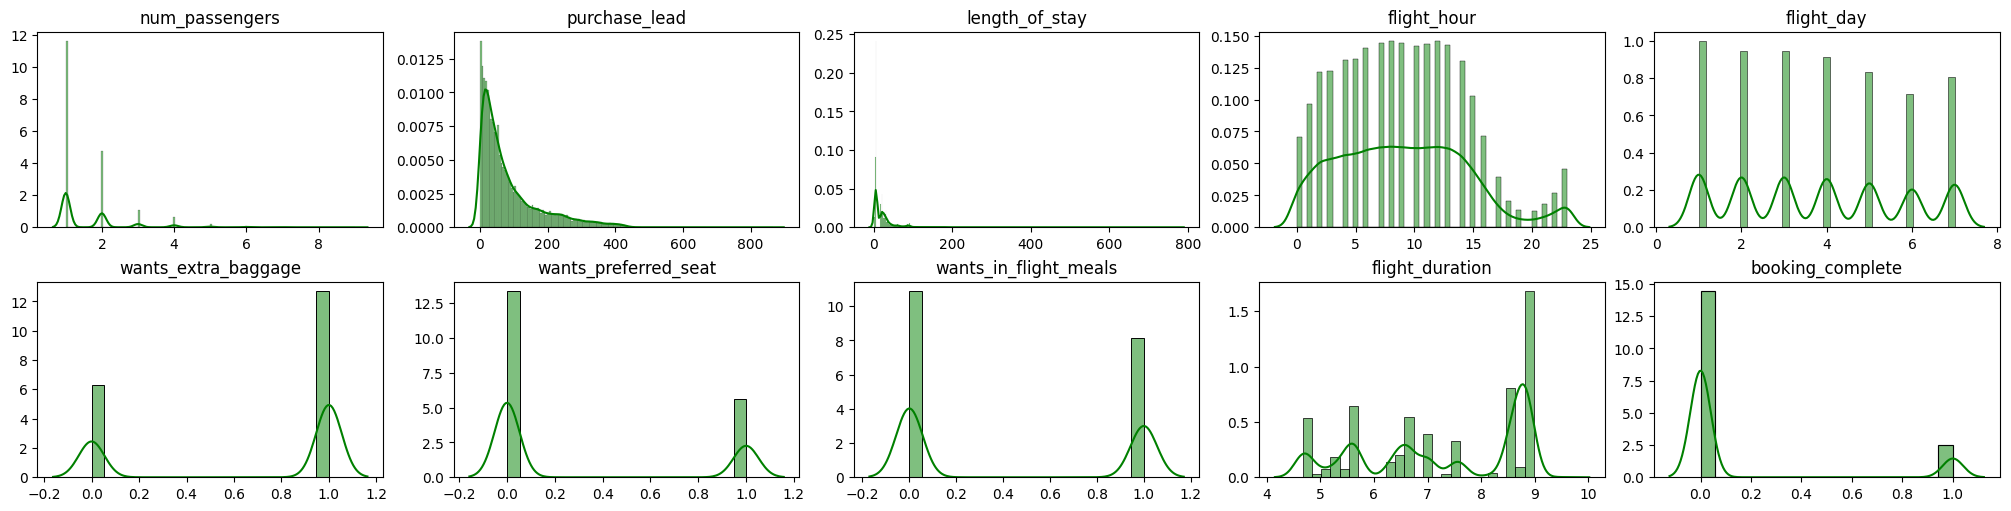

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(exclude='object').columns

n_rows = 2
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5), constrained_layout=True)

axes = axes.flatten()

for ax, col in zip(axes, numerical_columns):
    sns.histplot(df[col], kde=True, stat='density', kde_kws={'cut': 3}, color='green', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

for ax in axes[len(numerical_columns):]:
    ax.set_visible(False)

plt.show()

Generating a Correlation Diagram

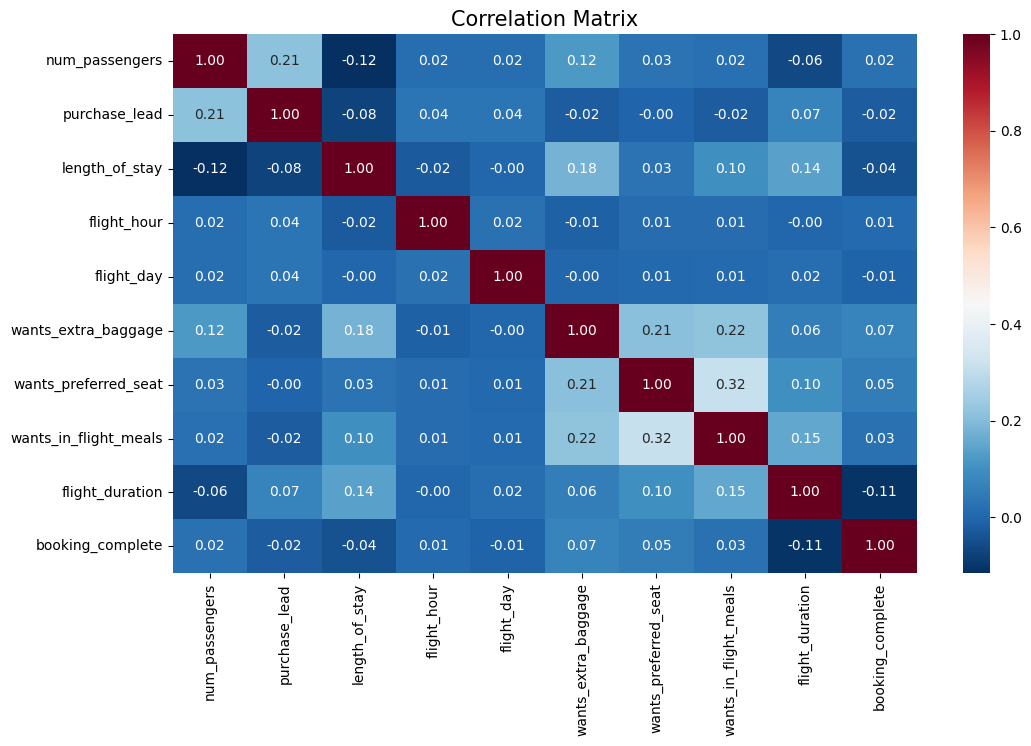

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(exclude='object')

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 7))

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    cbar=True
)

heatmap.set_title('Correlation Matrix', fontsize=15)

plt.show()

Dropping the columns that are not needed

In [35]:
X = df.drop('booking_complete', axis=1)

y = df['booking_complete']

for colname in X.select_dtypes(include=['object']).columns:
    X[colname] = X[colname].factorize()[0]

In [36]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

Finding the Mutual Information Score of Each Features with Respect to the Target Variable Y

In [37]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.053595
booking_origin           0.049074
flight_duration          0.017336
length_of_stay           0.006572
wants_extra_baggage      0.005335
wants_in_flight_meals    0.004372
flight_hour              0.003998
num_passengers           0.002988
purchase_lead            0.001373
wants_preferred_seat     0.001348
trip_type                0.000000
sales_channel            0.000000
flight_day               0.000000
Name: MI Scores, dtype: float64

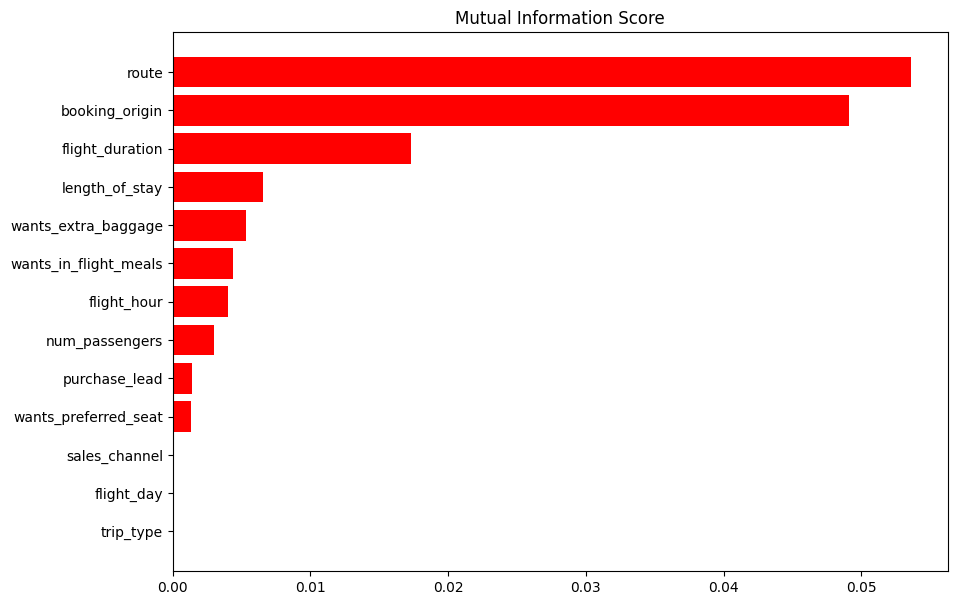

In [38]:
import numpy as np 

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color="red")
    plt.yticks(width, ticks)
    plt.title("Mutual Information Score")

plt.figure(dpi=100, figsize=(10,7))
plot_mi_scores(mi_scores)

Splitting the Data and Training it

In [39]:
from sklearn.model_selection import train_test_split

def split_dataset(X, y):
    X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

    X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=0)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

Defining the transformers for feature engineering with scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

Creating Different Model for Analysis

Random Forest Classifier with Top 6 Features

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'num_passengers']
X = df[features]

X = pd.get_dummies(X)
X = scale(X)
y = df['booking_complete']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds) * 100)
print('AUC Score: ', roc_auc_score(y_val, preds))

Accuracy:  82.94
AUC Score:  0.5833673091091537


Random Forest Classifier With All Features

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X = df.drop('booking_complete', axis=1)

# One hot encoding
X = pd.get_dummies(X)
X = scale(X)
y = df['booking_complete']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds) * 100)
print('AUC Score: ', roc_auc_score(y_val, preds))

Accuracy:  85.07000000000001
AUC Score:  0.5591766873007482


Validating Test Data

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

df = pd.read_csv('customer_booking.csv', encoding='latin1')

X = df.drop('booking_complete', axis=1)

X = pd.get_dummies(X)
X = scale(X)

y = df['booking_complete']

train_full_X, test_X, train_full_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds = forest_model.predict(test_X)

print('Accuracy: ', accuracy_score(test_y, preds) * 100)
print('AUC Score: ', roc_auc_score(test_y, preds))

Accuracy:  85.08
AUC Score:  0.5577207581035838
